In [2]:
%matplotlib inline
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import IPython.display as display

ImportError: No module named pandas

In [ ]:
%matplotlib inline
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import IPython.display as display

In [3]:
%matplotlib inline
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import IPython.display as display

In [4]:
def logistic_model(generations=20, 
                   growth_rate_min=0.5, 
                   growth_rate_max=4.0, 
                   growth_rate_steps=7, 
                   pop_initial=0.5):
    """
    returns a pandas dataframe with columns for each growth rate, row labels for each time step,
    and population values computed by the logistic model: pop[t + 1] = pop[t] * rate * (1 - pop[t])
    
    generations = number of iterations to run the model
    growth_rate_min = the first growth rate for the model, between 0 and 4
    growth_rate_max = the last growth rate for the model, between 0 and 4
    growth_rate_steps = how many growth rates between min (inclusive) and max (exclusive) to run the model on
    pop_initial = starting population when you run the model, between 0 and 1
    """
    
    # convert the growth rate min and max values to floats so we can divide them
    growth_rate_min = float(growth_rate_min)
    growth_rate_max = float(growth_rate_max)
    
    # calculate the size of each step
    growth_rate_step = (growth_rate_max - growth_rate_min) / growth_rate_steps
    
    # we want to go up to but not including the growth_rate_max
    growth_rate_max -= 0.0000000001
    
    # get a range of values to represent each growth rate we're modeling - these will be our columns
    growth_rates = np.arange(growth_rate_min, growth_rate_max, growth_rate_step)
    
    # create a new dataframe with one column for each growth rate and one row for each timestep (aka generation)
    pops = pd.DataFrame(columns=growth_rates, index=range(generations))
    pops.iloc[0] = pop_initial
    
    # for each column (aka growth rate) in the dataframe
    for rate in pops.columns:
        
        # pop is a copy of the pandas series of this column in the dataframe
        pop = pops[rate]
        
        # for each timestep in the number of iterations to run
        for t in range(generations - 1):
            
            # update the dataframe values by running this timestep of the logistic model
            pop[t + 1] = pop[t] * rate * (1 - pop[t])
    
    return pops

In [5]:
def get_bifurcation_points(pops, discard_gens):
    """
    convert a dataframe of values from the logistic model into a set of xy points that
    you can plot as a bifurcation diagram
    
    pops = population data output from the model
    discard_gens = number of rows to discard before keeping points to plot
    """
    
    # create a new dataframe to contain our xy points
    points = pd.DataFrame(columns=['x', 'y'])
    
    # drop the initial rows of the populations data, if specified by the argument
    if discard_gens > 0:
        discard_gens = np.arange(0, discard_gens)
        pops = pops.drop(labels=pops.index[discard_gens])
    
    # for each column in the logistic populations dataframe
    for rate in pops.columns:
        # append the growth rate as the x column and all the population values as the y column
        points = points.append(pd.DataFrame({'x':rate, 'y':pops[rate]}))
    
    # reset the index and drop the old index before returning the xy point data
    points = points.reset_index().drop(labels='index', axis=1)
    return points

In [6]:
def bifurcation_plot(pops, discard_gens=1, xmin=0, xmax=4, ymin=0, ymax=1, height=6, width=10):
    """
    plot the results of the logistic model as a bifurcation diagram
    
    pops = population data output from the model
    discard_gens = number of rows to discard before keeping points to plot
    xmin = minimum value on the x axis
    xmax = maximum value on the x axis
    ymin = minimum value on the y axis
    ymax = maximum value on the y axis
    height = the height of the figure to plot, in inches
    width = the width of the figure to plot, in inches
    """
    
    # first get the xy points to plot
    points = get_bifurcation_points(pops, discard_gens)
    
    # create a new matplotlib figure and axis and set its size
    fig, ax = plt.subplots()
    fig.set_size_inches(width, height)
    
    # plot the xy data
    bifurcation_scatter = ax.scatter(points['x'], points['y'], c='b', edgecolor='', alpha=1, s=1)
    
    # set x and y limits, title, and x and y labels
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_title('Bifurcation Diagram')
    ax.set_xlabel('Growth Rate')
    ax.set_ylabel('Population')
    
    plt.show()

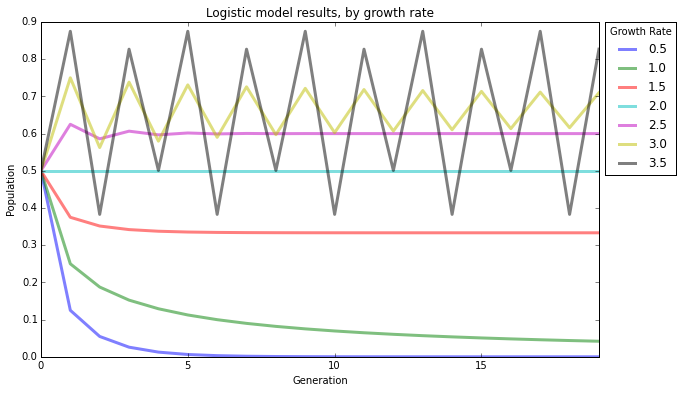

In [7]:
# plot the results of the logistic map run for these 7 different growth rates
pops = logistic_model()
ax = pops.plot(kind='line', figsize=[10, 6], linewidth='3', alpha=0.5)
ax.set_title('Logistic model results, by growth rate')
ax.set_xlabel('Generation')
ax.set_ylabel('Population')
ax.legend(title='Growth Rate', loc=3, bbox_to_anchor=(1, 0.525))
plt.show()

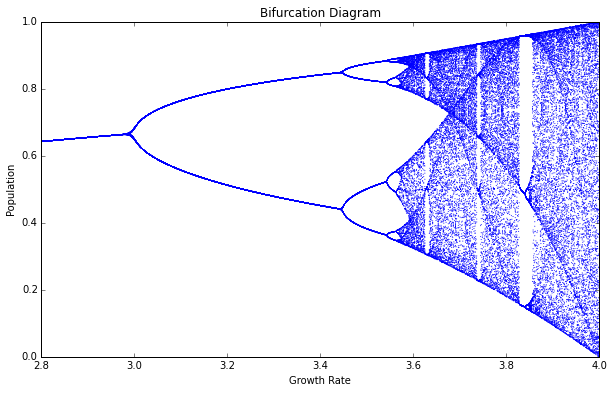

In [9]:
# run the model for 300 generations across 1,000 growth rate steps from 2.8 to 4, and plot the bifurcation diagram
# this plot is a zoomed-in look at the first plot and shows the period-doubling path to chaos
pops = logistic_model(generations=300, growth_rate_min=2.8, growth_rate_max=4, growth_rate_steps=1000)
bifurcation_plot(pops, discard_gens=200, xmin=2.8, xmax=4)

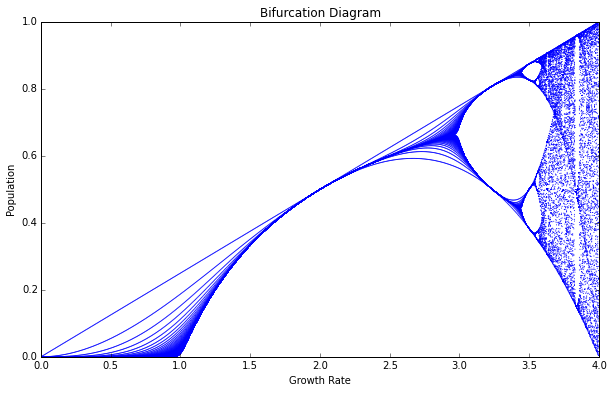

In [10]:
generations = 100
growth_rate_min = 0
growth_rate_max = 4
growth_rate_steps = 1000
pops = logistic_model(generations, growth_rate_min, growth_rate_max, growth_rate_steps)
bifurcation_plot(pops)

In [11]:
def bifurcation_plot(pops, discard_gens=1, xmin=0, xmax=4, ymin=0, ymax=1, height=6, width=10):
    """
    plot the results of the logistic model as a bifurcation diagram
    
    pops = population data output from the model
    discard_gens = number of rows to discard before keeping points to plot
    xmin = minimum value on the x axis
    xmax = maximum value on the x axis
    ymin = minimum value on the y axis
    ymax = maximum value on the y axis
    height = the height of the figure to plot, in inches
    width = the width of the figure to plot, in inches
    """
    
    # first get the xy points to plot
    points = get_bifurcation_points(pops, discard_gens)
    
    # create a new matplotlib figure and axis and set its size
    fig, ax = plt.subplots()
    fig.set_size_inches(width, height)
    
    # plot the xy data
    bifurcation_scatter = ax.scatter(points['x'], points['y'], c='b', edgecolor='', alpha=1, s=1)
    
    # set x and y limits, title, and x and y labels
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_title('Bifurcation Diagram')
    ax.set_xlabel('Growth Rate')
    ax.set_ylabel('Population')
    
    plt.show()

In [12]:
bifurcation_plot()

TypeError: bifurcation_plot() takes at least 1 argument (0 given)

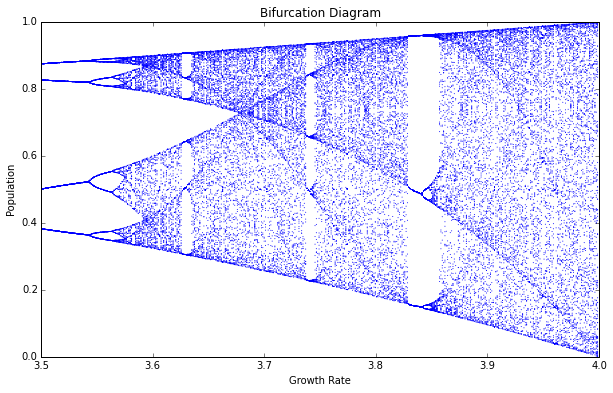

In [13]:
# run the model for 300 generations across 1,000 growth rate steps from 2.8 to 4, and plot the bifurcation diagram
# this plot is a zoomed-in look at the first plot and shows the period-doubling path to chaos
pops = logistic_model(generations=300, growth_rate_min=2.8, growth_rate_max=4, growth_rate_steps=1000)
bifurcation_plot(pops, discard_gens=200, xmin=3.5, xmax=4)

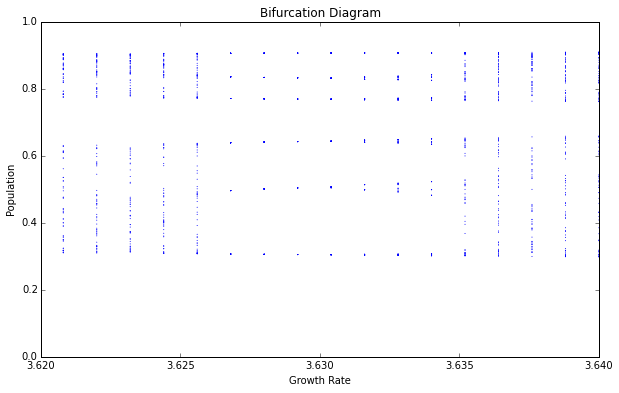

In [14]:
pops = logistic_model(generations=300, growth_rate_min=2.8, growth_rate_max=4, growth_rate_steps=1000)
bifurcation_plot(pops, discard_gens=200, xmin=3.62, xmax=3.64)

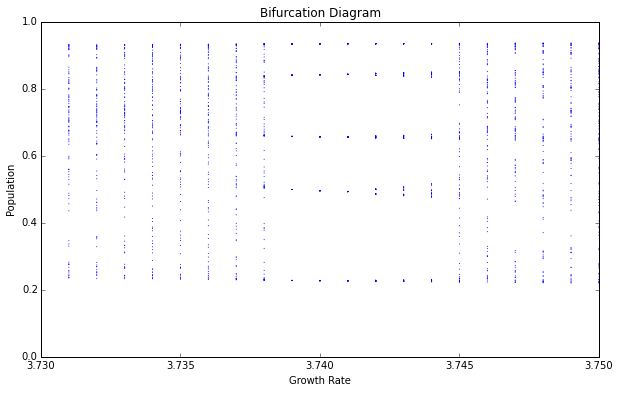

In [16]:
pops = logistic_model(generations=300, growth_rate_min=3.7, growth_rate_max=3.8, growth_rate_steps=100)
bifurcation_plot(pops, discard_gens=200, xmin=3.73, xmax=3.75)